In [2]:
# Read in the dataset
youtubers <- read.csv("/anvil/projects/tdm/data/youtube/most_subscribed_youtube_channels.csv",
                      stringsAsFactors = FALSE)

# Check the structure to confirm column names and types
str(youtubers)

'data.frame':	1000 obs. of  7 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Youtuber   : chr  "T-Series" "YouTube Movies" "Cocomelon - Nursery Rhymes" "SET India" ...
 $ subscribers: chr  "222,000,000" "154,000,000" "140,000,000" "139,000,000" ...
 $ video.views: chr  "198,459,090,822" "0" "135,481,339,848" "125,764,252,686" ...
 $ video.count: chr  "17,317" "0" "786" "91,271" ...
 $ category   : chr  "Music" "Film & Animation" "Education" "Shows" ...
 $ started    : int  2006 2015 2006 2006 2013 2010 2012 2015 2016 2013 ...


In [3]:
# Clean commas and convert to numeric
youtubers$video.count2 <- as.numeric(gsub(",", "", youtubers$video.count))

In [4]:
# Total number of videos by category
category_counts <- tapply(youtubers$video.count2, youtubers$category, sum, na.rm = TRUE)

# Display the result as reference
print(category_counts)

                           Autos & Vehicles                Comedy 
                11230                  2874                 93562 
            Education         Entertainment      Film & Animation 
               124727               2674176                133319 
               Gaming         Howto & Style                Movies 
               427292                 81419                  5576 
                Music       News & Politics Nonprofits & Activism 
               510337               2754693                188445 
       People & Blogs        Pets & Animals  Science & Technology 
              1045091                 23960                 36622 
                Shows                Sports              Trailers 
               283027                140464                 13613 
      Travel & Events 
                  632 


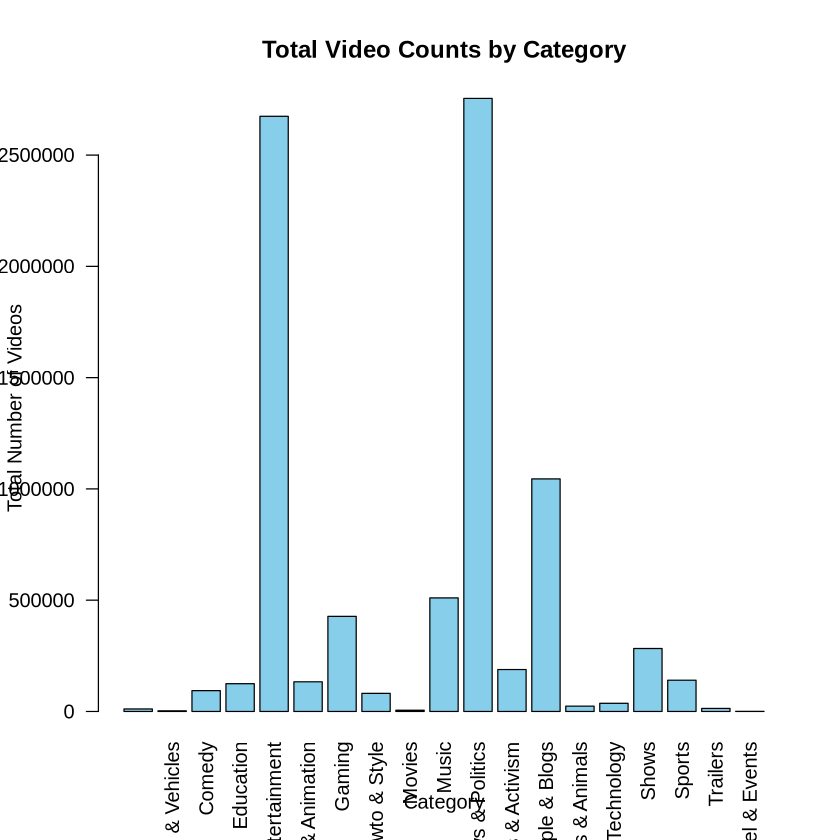

In [5]:
# Barplot
barplot(category_counts,
        las = 2,                          # rotate x-axis labels
        col = "skyblue",
        main = "Total Video Counts by Category",
        xlab = "Category",
        ylab = "Total Number of Videos")

In [6]:
# Subset to Gaming and Music
gm_subset <- subset(youtubers, category %in% c("Gaming", "Music"))

In [7]:
# Total videos by category and started year
gm_counts <- tapply(gm_subset$video.count2,
                    list(gm_subset$started, gm_subset$category),
                    sum, na.rm = TRUE)

# View the table to find the year with highest Gaming output
print(gm_counts)

     Gaming  Music
2005  17878   1446
2006 163116  36423
2007  11967  51621
2008  16356  33451
2009  15342  16392
2010   9998  31766
2011  27421  89353
2012  72858  44299
2013  32267  71681
2014  31332 119692
2015   7342   5447
2016   7903   8477
2017   9302    156
2018   2952    121
2019   1126     12
2020    132     NA


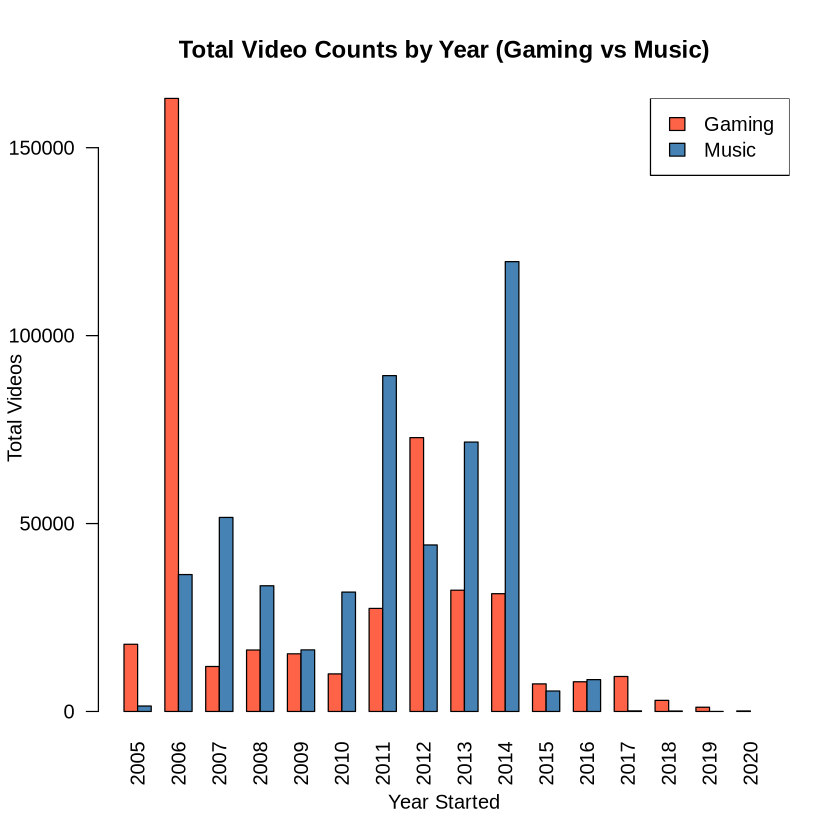

In [8]:
barplot(t(gm_counts),
        beside = TRUE,
        col = c("tomato", "steelblue"),
        las = 2,
        main = "Total Video Counts by Year (Gaming vs Music)",
        xlab = "Year Started",
        ylab = "Total Videos")

legend("topright",
       legend = colnames(gm_counts),
       fill = c("tomato", "steelblue"))

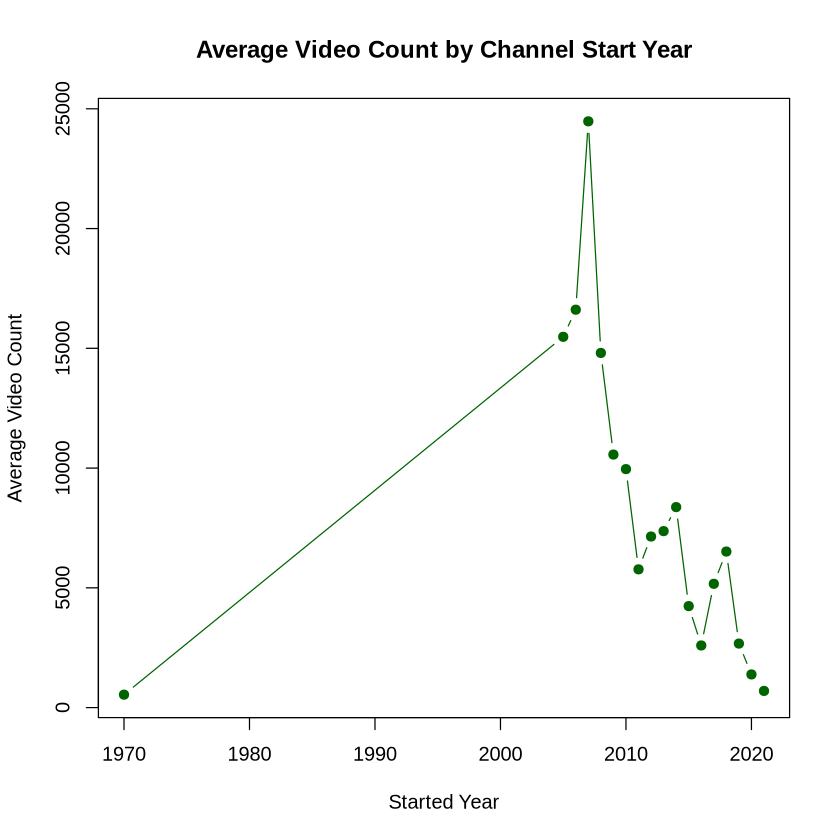

In [10]:
# Average video count by year
avg_counts_by_year <- tapply(youtubers$video.count2, youtubers$started, mean, na.rm = TRUE)

# Plot it
plot(names(avg_counts_by_year), avg_counts_by_year,
     type = "b",
     pch = 19,
     col = "darkgreen",
     main = "Average Video Count by Channel Start Year",
     xlab = "Started Year",
     ylab = "Average Video Count")

In [11]:
avg_counts_by_year["2008"]

2008 
14807.33

In [12]:
# Read in Taylor Swift dataset
ts_songs <- read.csv2("/anvil/projects/tdm/data/spotify/taylor_swift_discography_updated.csv",
                      stringsAsFactors = FALSE)

# Check dataset dimensions
dim(ts_songs)  # should be 577 rows × 28 columns

# Optional: set display options
options(repr.matrix.max.cols = 50, repr.matrix.max.rows = 200)

[1] 577  28

In [13]:
ts_songs <- ts_songs[ , !(names(ts_songs) %in% "track_lyrics")]

# View first few rows to confirm
head(ts_songs)ts_songs$energy <- as.numeric(ts_songs$energy)


ERROR: Error in parse(text = x, srcfile = src): <text>:4:15: unexpected symbol
3: # View first few rows to confirm
4: head(ts_songs)ts_songs
                 ^


In [14]:
ts_songs$energy <- as.numeric(ts_songs$energy)

# Check summary statistics for energy
summary(ts_songs$energy)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1180  0.4170  0.5700  0.5649  0.7200  0.9500 

In [15]:
find_songs_with_energy <- function(input_df, threshold) {
  result <- input_df[input_df$energy >= threshold, ]
  return(result)
}

In [16]:
medianset <- median(ts_songs$energy, na.rm = TRUE)
medianset

[1] 0.57

In [17]:
high_energy_df <- find_songs_with_energy(ts_songs, medianset)

# Check number of high energy songs
nrow(high_energy_df)

[1] 289

In [18]:
find_songs_by_album <- function(input_df, album_name) {
  result <- input_df[input_df$album == album_name, ]
  return(result)
}

In [19]:
ttpd_songs <- find_songs_by_album(ts_songs, "The Tortured Poets Department: The Anthology")

# Check the result
dim(ttpd_songs)  # Should be 31 rows
ttpd_songs[ , c("track_name", "album", "energy")]  # Display selected columns

[1] 31 28

,track_name,album,energy
,<chr>,<chr>,<dbl>
1,Fortnight (feat. Post Malone),The Tortured Poets Department: The Anthology,0.386
2,The Tortured Poets Department,The Tortured Poets Department: The Anthology,0.428
3,My Boy Only Breaks His Favorite Toys,The Tortured Poets Department: The Anthology,0.563
4,Down Bad,The Tortured Poets Department: The Anthology,0.366
5,"So Long, London",The Tortured Poets Department: The Anthology,0.533
6,But Daddy I Love Him,The Tortured Poets Department: The Anthology,0.720
7,Fresh Out The Slammer,The Tortured Poets Department: The Anthology,0.483
8,Florida!!! (feat. Florence + The Machine),The Tortured Poets Department: The Anthology,0.573
9,Guilty as Sin?,The Tortured Poets Department: The Anthology,0.428


In [20]:
# Attempt to convert spotify_streams to numeric
ts_songs$numeric_streams <- as.numeric(ts_songs$spotify_streams)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [21]:
# Identify values that were non-NA originally but became NA after conversion
ts_songs[is.na(ts_songs$numeric_streams) & !is.na(ts_songs$spotify_streams), "spotify_streams"]

[1] "102.221.045"   "151.282.408"   "182.418.311"   "118.458.965"  
  [5] "88.205.974"    "101.800.187"   "77.667.730"    "75.816.684"   
  [9] "695.045.271"   "64.895.368"    "238.858.492"   "66.435.115"   
 [13] "86.966.267"    "65.608.381"    "67.947.237"    "106.436.747"  
 [17] "239.579.759"   "161.739.029"   "243.929.951"   "97.666.137"   
 [21] "327.037.965"   "57.248.658"    "102.221.045"   "151.282.408"  
 [25] "182.418.311"   "118.458.965"   "88.205.974"    "101.800.187"  
 [29] "77.667.730"    "75.816.684"    "695.045.271"   "64.895.368"   
 [33] "238.858.492"   "66.435.115"    "86.966.267"    "65.608.381"   
 [37] "67.947.237"    "106.436.747"   "239.579.759"   "161.739.029"  
 [41] "243.929.951"   "97.666.137"    "327.037.965"   "161.201.338"  
 [45] "111.149.636"   "180.262.965"   "95.341.130"    "99.582.468"   
 [49] "91.554.198"    "89.206.080"    "52.613.223"    "256.720.162"  
 [53] "116.688.485"   "44.117.403"    "72.179.901"    "72.138.383"   
 [57] "119.043.402"   "50.628.387"    "37.442.081"    "79.599.951"   
 [61] "75.501.290"    "233.537.019"   "77.280.948"    "85.579.355"   
 [65] "78.097.730"    "685.569.376"   "442.240.497"   "1.497.861.842"
 [69] "418.499.855"   "558.461.539"   "631.931.332"   "289.677.180"  
 [73] "379.998.152"   "511.571.475"   "263.703.912"   "737.680.743"  
 [77] "265.543.423"   "328.656.338"   "269.420.309"   "175.821.082"  
 [81] "176.277.983"   "148.303.282"   "118.355.491"   "257.804.372"  
 [85] "123.378.107"   "177.054.741"   "172.680.008"   "86.528.064"   
 [89] "685.569.376"   "442.240.497"   "1.497.861.842" "418.499.855"  
 [93] "558.461.539"   "631.931.332"   "289.677.180"   "379.998.152"  
 [97] "511.571.475"   "263.703.912"   "737.680.743"   "265.543.423"  
[101] "328.656.338"   "269.420.309"   "175.821.082"   "176.277.983"  
[105] "148.303.282"   "118.355.491"   "257.804.372"   "123.378.107"  
[109] "685.569.376"   "442.240.497"   "1.497.861.842" "418.499.855"  
[113] "558.461.539"   "631.931.332"   "289.677.180"   "379.998.152"  
[117] "511.571.475"   "263.703.912"   "737.680.743"   "265.543.423"  
[121] "328.656.338"   "119.887.717"   "276.457.730"   "107.168.641"  
[125] "331.115.790"   "249.885.271"   "265.698.765"   "89.369.701"   
[129] "315.588.138"   "86.371.415"    "108.741.392"   "84.058.644"   
[133] "93.349.578"    "74.802.137"    "144.156.621"   "68.667.868"   
[137] "98.591.643"    "69.027.319"    "108.053.400"   "56.901.647"   
[141] "51.126.307"    "42.569.086"    "139.140.884"   "209.924.444"  
[145] "118.151.653"   "185.024.136"   "206.457.482"   "90.351.777"   
[149] "135.457.781"   "166.946.516"   "810.542.565"   "276.701.835"  
[153] "97.490.294"    "714.184.368"   "86.368.640"    "94.810.816"   
[157] "619.978.693"   "64.707.634"    "55.729.532"    "70.295.638"   
[161] "397.666.679"   "107.430.716"   "50.543.835"    "43.303.976"   
[165] "54.359.548"    "55.397.353"    "50.407.943"    "39.608.696"   
[169] "35.505.550"    "69.531.567"    "51.835.918"    "109.187.805"  
[173] "358.733.130"   "57.957.104"    "76.512.224"    "68.743.624"   
[177] "53.973.432"    "814.114.651"   "588.394.719"   "279.044.935"  
[181] "260.055.245"   "297.807.837"   "266.696.518"   "180.744.525"  
[185] "168.010.057"   "174.430.479"   "211.246.717"   "180.507.774"  
[189] "190.498.817"   "205.207.043"   "119.250.347"   "208.212.731"  
[193] "315.084.417"   "105.356.578"   "814.114.651"   "588.394.719"  
[197] "279.044.935"   "260.055.245"   "297.807.837"   "266.696.518"  
[201] "180.744.525"   "168.010.057"   "174.430.479"   "211.246.717"  
[205] "180.507.774"   "190.498.817"   "205.207.043"   "119.250.347"  
[209] "208.212.731"   "552.789.777"   "1.240.468.789" "350.113.872"  
[213] "732.129.402"   "456.830.802"   "401.624.104"   "298.361.936"  
[217] "1.039.423.219" "375.813.987"   "389.023.820"   "351.443.321"  
[221] "206.915.468"   "179.012.062"   "339.198.629"   "202.357.820"  
[225] "180.324.854"   "147.911.887"   "17.256.353"    "22.319.608"   
[229] "13.10

In [22]:
# Remove periods and convert to numeric
ts_songs$cleaned_streams <- gsub("\\.", "", ts_songs$spotify_streams)
ts_songs$numeric_streams <- as.numeric(ts_songs$cleaned_streams)

# Check structure
str(ts_songs$numeric_streams)

 num [1:577] 6.49e+08 2.07e+08 2.38e+08 3.18e+08 2.54e+08 ...


In [23]:
find_songs_by_album <- function(input_df, album_name) {
  result <- input_df[input_df$album == album_name, ]
  return(result)
}

In [24]:
evermore <- find_songs_by_album(ts_songs, "evermore (deluxe version)")

# Check number of songs
nrow(evermore)

[1] 17

In [25]:
find_songs_by_album <- function(input_df, album_name) {
  result <- input_df[input_df$album == album_name, ]
  return(result)
}

# Create ts_1989 dataframe
ts_1989 <- find_songs_by_album(ts_songs, "1989 (Taylor’s Version) [Deluxe]")

# Check number of songs and first few rows
nrow(ts_1989)     # Should be 22 songs
head(ts_1989)

[1] 0

ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,track_number,album_musical_genre,album_type,release_date,album_physical_sales,track_lyrics,track_theme,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,numeric_streams,cleaned_streams
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>


In [26]:
# Convert duration to seconds and minutes
ts_1989$duration_sec <- ts_1989$duration_ms / 1000
ts_1989$duration_min <- ts_1989$duration_sec / 60

# Check the result
head(ts_1989[ , c("track_name", "duration_ms", "duration_sec", "duration_min")])

track_name,duration_ms,duration_sec,duration_min
<chr>,<int>,<dbl>,<dbl>


In [29]:
convert_duration <- function(df) {
  df$duration_sec <- df$duration_ms / 1000
  df$duration_min <- df$duration_sec / 60
  return(df)
}

In [30]:
ts_1989_converted <- convert_duration(ts_1989)

# Show first six rows to confirm the new columns
head(ts_1989_converted)

ID,track_name,track_musical_genre,track_type,duration_ms,feature,track_videoclip,videoclip_views,spotify_streams,spotify_global_peak,album,track_number,album_musical_genre,album_type,release_date,album_physical_sales,track_lyrics,track_theme,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,numeric_streams,cleaned_streams,duration_sec,duration_min
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>


In [31]:
# Convert subscribers column to numeric
youtubers$subscribers2 <- as.numeric(gsub(",", "", youtubers$subscribers))

# Check structure to confirm conversion
str(youtubers$subscribers2)

 num [1:1000] 2.22e+08 1.54e+08 1.40e+08 1.39e+08 1.16e+08 1.11e+08 1.02e+08 9.97e+07 9.92e+07 9.27e+07 ...


In [32]:
find_top_youtuber_by_genre <- function(df, genre) {
  # Subset rows that match the genre
  genre_rows <- df[df$category == genre, ]
  
  # Find index of max subscribers2
  top_index <- which.max(genre_rows$subscribers2)
  
  # Return that row
  return(genre_rows[top_index, ])
}

In [33]:
top_gaming <- find_top_youtuber_by_genre(youtubers, "Gaming")
top_gaming

,rank,Youtuber,subscribers,video.views,video.count,category,started,video.count2,subscribers2
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>
6,6,PewDiePie,"111,000,000","28,469,458,228","4,497",Gaming,2010,4497,1.11e+08


In [34]:
table(youtubers$category)


                           Autos & Vehicles                Comedy 
                   27                     1                    63 
            Education         Entertainment      Film & Animation 
                   46                   241                    52 
               Gaming         Howto & Style                Movies 
                  102                    45                     2 
                Music       News & Politics Nonprofits & Activism 
                  222                    27                     2 
       People & Blogs        Pets & Animals  Science & Technology 
                  119                     6                    18 
                Shows                Sports              Trailers 
                   14                    10                     2 
      Travel & Events 
                    1 

In [ ]:
# This dataset shows the YouTube landscape from about 3 years ago. At this point in time PewDiePie was the top gaming creator, and T-Series was the top in music. Since then Mr.Beast has shot to the top, passing both of them. This is a good representation to show how dynamic the ranking on Youtube are over a fairly short period of time. 